<a href="https://colab.research.google.com/github/rsilraf/bootcamp_datascience_alura2021/blob/main/Alura_bootcamp_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 1

## Aula 01

In [2]:
import pandas as pd

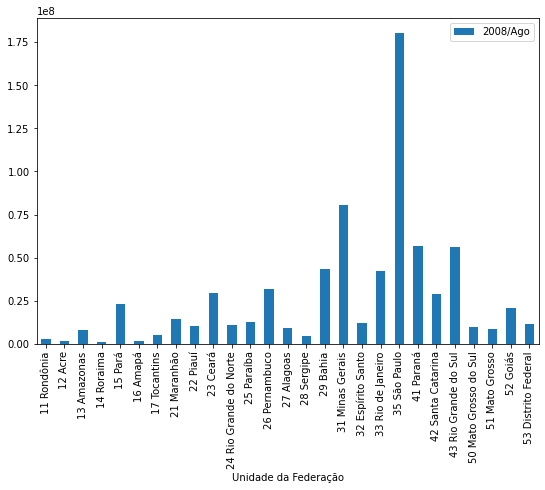

In [75]:
pd.options.display.float_format = "{:2}".format

DATA_FILE = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ds_alura/amatend-A125835189_28_143_208.csv"

dados = pd.read_csv( DATA_FILE, 
                    encoding="ISO-8859-1", sep=";", 
                    skiprows=3, skipfooter=12, 
                    thousands=".", decimal=",",
                    # parse_dates=True, infer_datetime_format=True,
                    engine='python'
                    )

dados.tail()
# dados["2008/Ago"].mean()
dados.plot(x="Unidade da Federação", 
           y="2008/Ago",
           kind="bar",
           figsize=(9,6)
          )


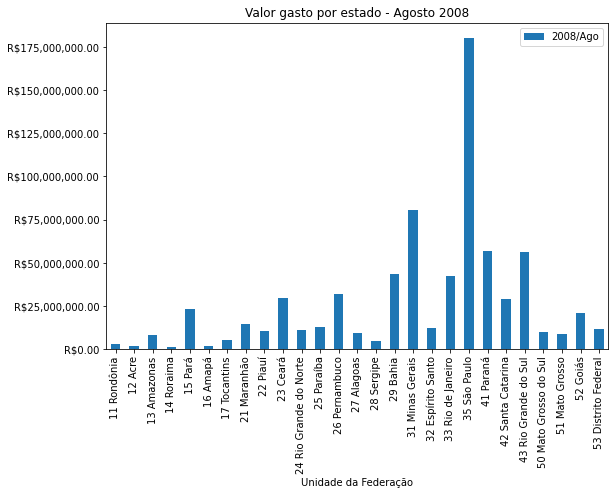

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", 
           y="2008/Ago",
           kind="bar",
           figsize=(9,6))
plt.title("Valor gasto por estado - Agosto 2008")
ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter("R${x:,.2f}"))

### DESAFIOS
1)
Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

2)
Faça a mesma análise realizada em aula, porém para o mês mais recente.

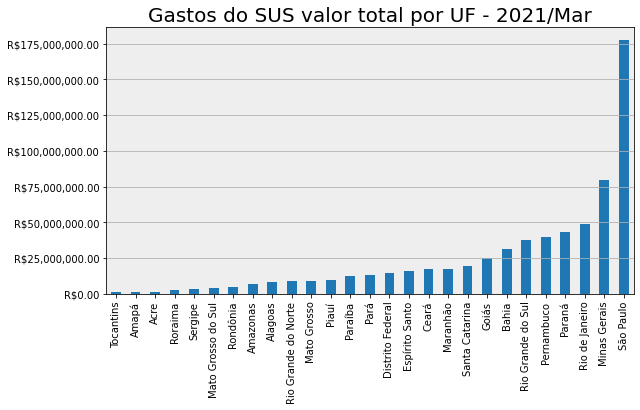

In [124]:
import re
UF = 'Unidade da Federação'
RE_NUMEROS = r'\d+ '

dados[UF]      = dados[UF].apply(lambda uf: re.sub( RE_NUMEROS, '', uf ))  # limpa uf, ex: '12 Acre' -> 'Acre'
mais_recente   = dados.columns[-2]  # <ano YYYY>/<mes abc>
dados_recentes = dados.sort_values(by=mais_recente)

ax = dados_recentes.plot(x=UF, y=mais_recente, kind='bar', figsize=(9,6))

plt.title(f'Gastos do SUS valor total por UF - {mais_recente}', fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_facecolor('#eee')
ax.grid(axis='y')
plt.tight_layout()
plt.xlabel('')
ax.get_legend().remove()


# Outros


In [7]:
# https://realpython.com/python-matplotlib-guide/

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)


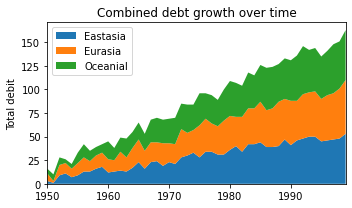

In [8]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
ax.stackplot(yrs, rng+rnd, labels=['Eastasia', 'Eurasia', 'Oceanial'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debit')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

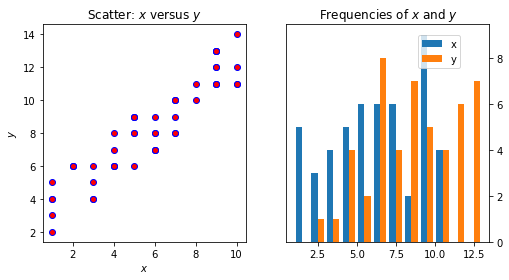

In [9]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1,5, size=x.size)
data = np.column_stack((x,y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# >>> fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
# >>> ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d


ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x','y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
